# Bondi-Hoyle-Lyttleton

In [1]:
#import harm_script as harm
# -i option: run the script in Jupyter's namespace
%run -i harm_script.py   

In [2]:
import os

# change the directory below to your own, which contains "dumps" subfolder
os.chdir("/Users/astrodoo/Work/WorkShop/2019.07.15_ATA_SummerSchool@UvA/harmpi_output/BHL")

In [3]:
""" Read the data """
dumpn = 70

rg("gdump")
rd("dump"+"%3.3d"%dumpn)
print("time: %f (R_g/c)"%t)

time: 700.039124 (R_g/c)


In [4]:
""" compute the coordinates in Cartesian """
ph[...] = 0.
cart_coords()
velocity_cart()

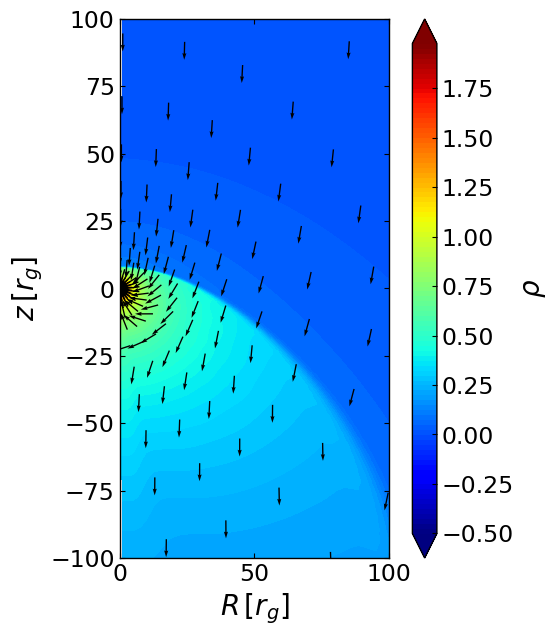

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(6,7))
xmax=100  
ymax=100

plc(np.log10(rho),xy=1,xmax=xmax,ymax=ymax,levels=np.linspace(-0.5,2.,100,endpoint=False), \
    xla=r'$R\, [r_g]$',yla=r'$z\, [r_g]$',cbyla=r'$\rho$',
    cb=True,isfilled=True,ax=ax,cmap='jet',extend='both',symmx=False)

skip1 = 10 # reduce the number of arrows
skip2 = 10 # reduce the number of arrows
ax.quiver(X[1,::skip1,::skip2,0],X[3,::skip1,::skip2,0], \
          uu_cart[1,::skip1,::skip2,0]/np.sqrt(uu_cart[1,::skip1,::skip2,0]**2+uu_cart[3,::skip1,::skip2,0]**2), \
          uu_cart[3,::skip1,::skip2,0]/np.sqrt(uu_cart[1,::skip1,::skip2,0]**2+uu_cart[3,::skip1,::skip2,0]**2), \
          scale=15,width=0.005)

ax.set_aspect('equal')

## Draw the contour with stream line

In [6]:
""" Since "matplot.streamplot" is requried to input the data in uniform grid, 
    the sample of (x,y,ux,uy) is needed to be interpolated from the original data-set """

from scipy.ndimage import map_coordinates as mapcd

# set the parameters for data sample
rmax = 110   # maximum radius for the stream line
nx = 10      # x sample size
ny = 20      # y sample size
unix = np.linspace(0,rmax,nx)
uniy = np.linspace(-rmax,rmax,ny)

# generate the grid in 2D
x2d,y2d = np.meshgrid(unix,uniy,indexing='ij')

# convert to spherical coordinates
r2d = np.sqrt(x2d*x2d + y2d*y2d)
h2d = np.arccos(y2d/r2d)

# find the indices of the grid in the data-sample
iind_int = np.zeros((nx,ny),dtype=np.float32)
jind_int = np.zeros((nx,ny),dtype=np.float32)
for i in range(nx):
    for j in range(ny):
        if (np.max(r[:,0,0]) > r2d[i,j]):
            iind = np.where(r[:,0,0]>r2d[i,j])[0][0]
            if (iind != 0):
                iind_int[i,j] = iind + (r2d[i,j] - r[iind,0,0])/(r[iind,0,0]-r[iind-1,0,0])
            else:
                iind_int[i,j] = -1
        else: 
            iind_int[i,j] = len(r[:,0,0])-1
            
        if (np.max(h[0,:,0]) > h2d[i,j]):
            jind = np.where(h[0,:,0]>h2d[i,j])[0][0]
            if (jind != 0):
                jind_int[i,j] = jind + (h2d[i,j] - h[0,jind,0])/(h[0,jind,0]-h[0,jind-1,0])
            else:
                jind_int[i,j] = -1
        else:
            jind_int[i,j] = len(h[0,:,0])-1
        
# interpolate the velocities
ux2d = (mapcd(uu_cart[1,:,:,0],[[iind_int],[jind_int]],order=1,mode='nearest'))[0]
uy2d = (mapcd(uu_cart[3,:,:,0],[[iind_int],[jind_int]],order=1,mode='nearest'))[0]      

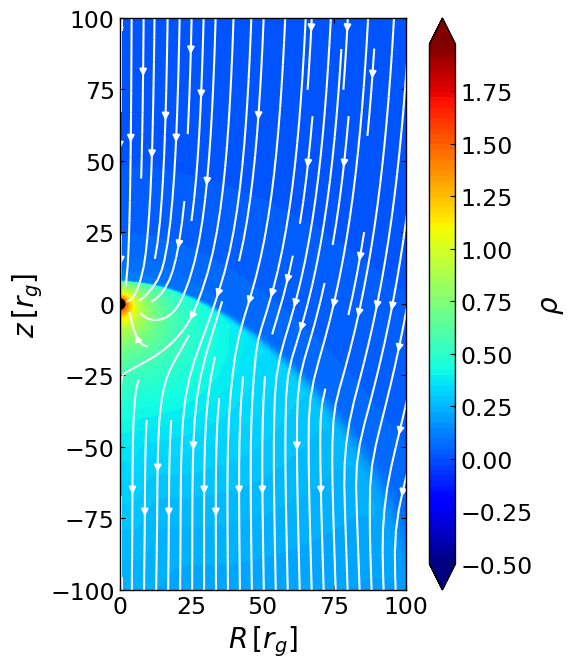

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(6,7))
xmax=100  
ymax=100

plc(np.log10(rho),xy=1,xmax=xmax,ymax=ymax,levels=np.linspace(-0.5,2.,100,endpoint=False), \
    xla=r'$R\, [r_g]$',yla=r'$z\, [r_g]$',cbyla=r'$\rho$',
    cb=True,isfilled=True,ax=ax,cmap='jet',extend='both',symmx=False)

ax.streamplot(x2d[:,0],y2d[0,:],ux2d.T,uy2d.T,color='white')
ax.set_aspect('equal')

#fig.tight_layout()
#fig.savefig('BHL_stream.png')

## make a movie

In [9]:
import os
if (not os.path.isdir('images')): os.mkdir('images')

movie(0,100,xmax1=20,skip1=16,skip2=16)

The quantity you are trying to plot is a constant = 0.


<Figure size 800x600 with 0 Axes>